In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

### load the datset

In [8]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

#### Scale the data

In [9]:
x_train = x_train/255
x_test = x_test /255

### Build the model

In [12]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(3,3),activation='relu'))
#1st pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))


#2nd convolution layer
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
#2nd pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [13]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [14]:
#plot_model(model, show_layer_activations=True,show_layer_names=True,show_shapes=True)

### Compile the model

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model

In [18]:
history = model.fit (x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 37s 6ms/step - loss: 0.1251 - accuracy: 0.9606
Epoch 2/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 3/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0363 - accuracy: 0.9893
Epoch 4/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0276 - accuracy: 0.9919
Epoch 5/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 6/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 7/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0178 - accuracy: 0.9948
Epoch 8/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 9/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0139 - accuracy: 0.9959
Epoch 10/10
6000/6000 [==============================] - 34s 6ms/step -

## Evaluate the model


In [19]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 42s 4ms/step - loss: 0.0389 - accuracy: 0.9905


[0.03888774290680885, 0.9904999732971191]

### Predict on new image 

In [20]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [21]:
new=x_test[1234]

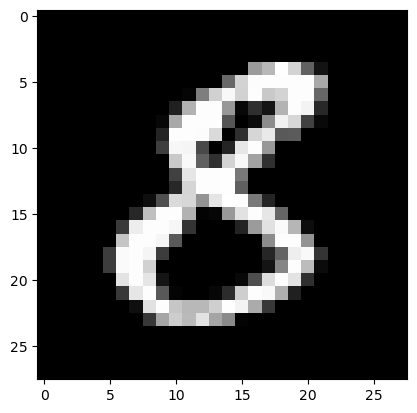

In [22]:
plt.imshow(new, cmap='gray');

#### Predict on new image

In [27]:
import cv2

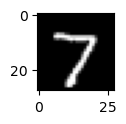

In [28]:
img = cv2.imread('seven.png',0)
img = cv2.resize(img,(28,28))
plt.figure(figsize=(1,1))
plt.imshow(img, cmap='gray')

In [29]:
img=img/255
img = img.reshape(1,28,28)
result = model.predict(img)
np.argmax(result)

1/1 [==============================] - 0s 43ms/step


7